In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv(r"CNNdata\fulldata.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"])
df.set_index(df["DateTime"], inplace=True)
df = df.resample("50ms").mean()
df = df.fillna(method="ffill")

df_FB = pd.read_csv(r"CNNdata\fulldata_FB.csv")
df_FB["DateTime"] = pd.to_datetime(df_FB["DateTime"])
df_FB.set_index(df_FB["DateTime"], inplace=True)
df_FB = df_FB.resample("50ms").mean()
df_FB = df_FB.fillna(method="ffill")


C:\Users\dbjac\AppData\Local\Temp\ipykernel_976\4149463128.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")
C:\Users\dbjac\AppData\Local\Temp\ipykernel_976\4149463128.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_FB = df_FB.fillna(method="ffill")


In [19]:
def ek(df):
    
    df = df.fillna(method='ffill')
    numerator = ( df["Returns"] - df["Returns"].mean() )**4
    denominator = ( df["Returns"] - (df["Returns"].mean())**2 )
    excess_k = (numerator.mean()/(denominator.mean())**2 )- 3
    print(sample," Excess Kurtosis: ",excess_k)    



Text(0.5, 0, 'log return')

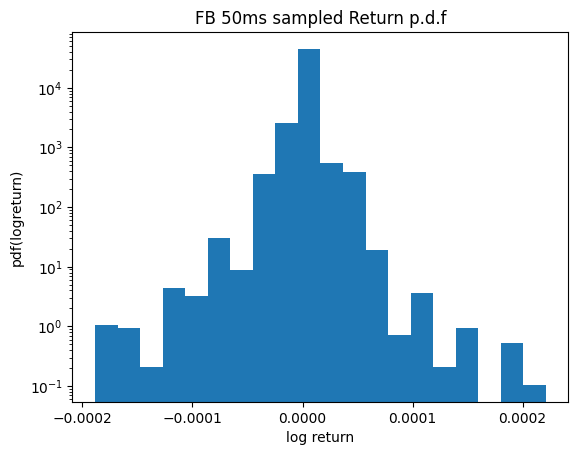

In [20]:
plt.hist(df_FB["Returns"],density=True,bins=20)
plt.yscale("log")
plt.title("FB 50ms sampled Return p.d.f")
plt.ylabel("pdf(logreturn)")
plt.xlabel("log return")


Text(0.5, 0, 'log return')

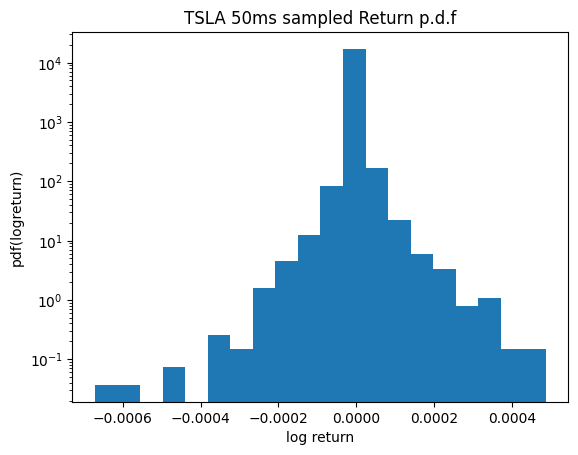

In [21]:
plt.hist(df["Returns"],density=True,bins=20)
plt.yscale("log")
plt.title("TSLA 50ms sampled Return p.d.f")
plt.ylabel("pdf(logreturn)")
plt.xlabel("log return")
